In [131]:
# Import necessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [132]:
weather_df = pd.read_csv('weather_data_clean.csv')
weather_df.shape
weather_df.head()

,date,high,low,precipitation,real feel,real feel shade,max uv index,wind
0,2024-07-24,21,19,1.00,24,21,4,11
1,2024-07-25,21,19,1.00,24,21,4,11
2,2024-07-26,23,19,0.96,28,24,5,9
3,2024-07-27,23,19,0.97,28,24,4,7
4,2024-07-28,20,19,0.95,24,22,4,6


Double check dtypes and for null values

In [133]:
weather_df.dtypes

date                object
high                 int64
low                  int64
precipitation      float64
real feel            int64
real feel shade      int64
max uv index         int64
wind                 int64
dtype: object

In [134]:
weather_df.isnull().sum()

date               0
high               0
low                0
precipitation      0
real feel          0
real feel shade    0
max uv index       0
wind               0
dtype: int64

In [135]:
# Remove year from date col, since we know the current year
# This is purely for analysis purposes
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['date'] = weather_df['date'].dt.strftime('%m-%d')

weather_df.head()

,date,high,low,precipitation,real feel,real feel shade,max uv index,wind
0,07-24,21,19,1.00,24,21,4,11
1,07-25,21,19,1.00,24,21,4,11
2,07-26,23,19,0.96,28,24,5,9
3,07-27,23,19,0.97,28,24,4,7
4,07-28,20,19,0.95,24,22,4,6


### Check for distribution of values with histogram plot

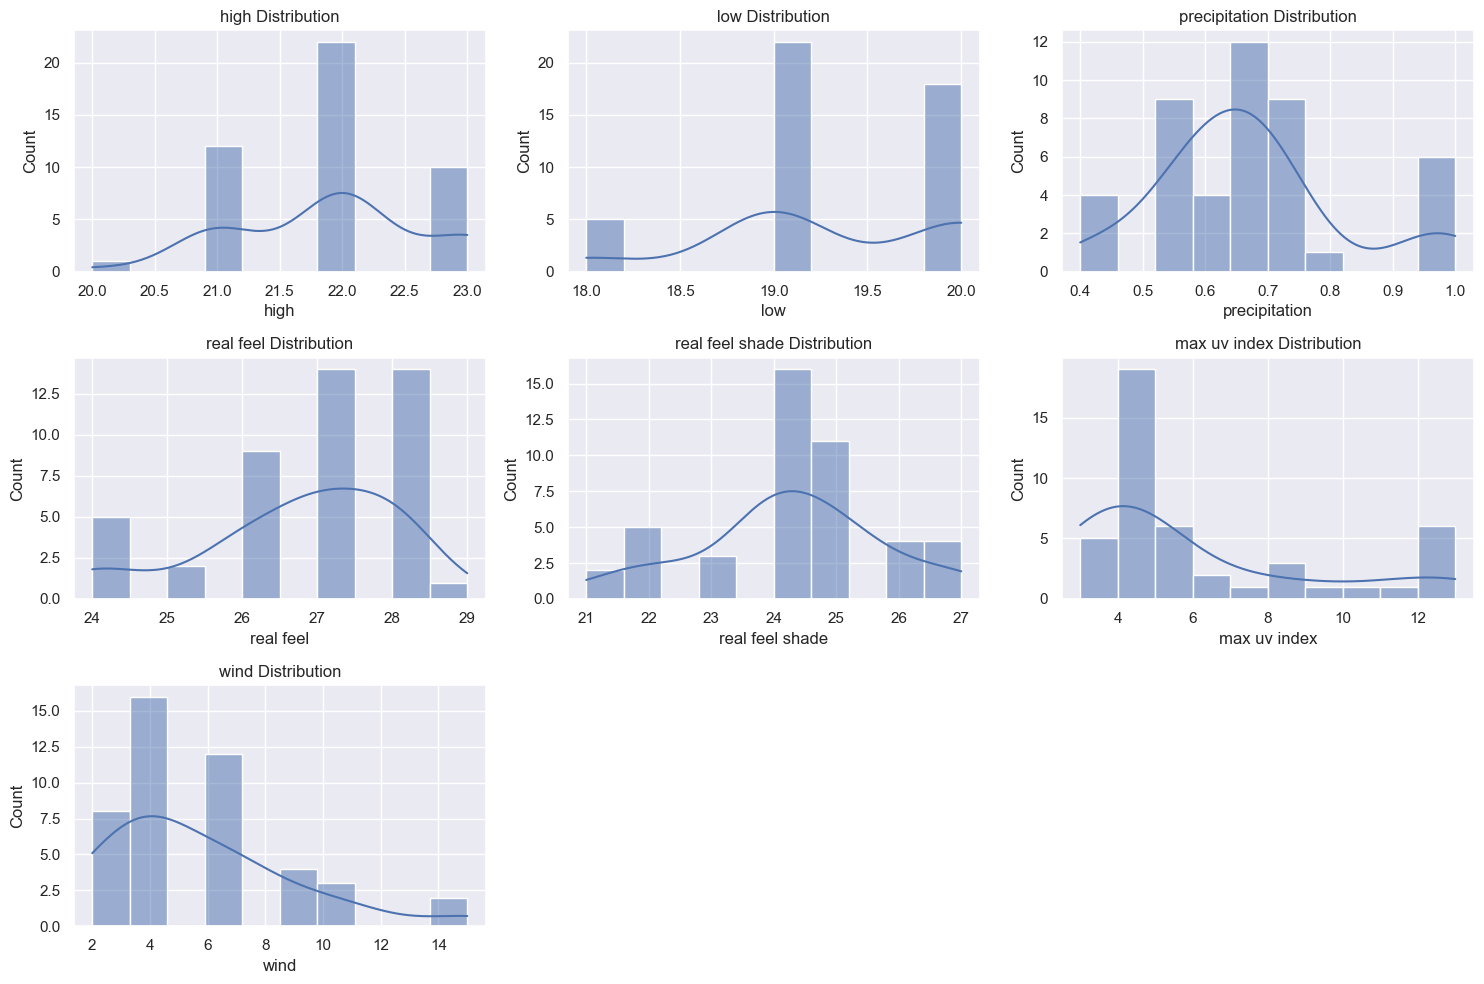

In [136]:
# Use a list of feature cols so we can easily graph per col
feature_cols = ['high', 'low', 'precipitation', 'real feel', 'real feel shade', 'max uv index', 'wind']

plot_cols = 3
plot_rows = len(feature_cols) // plot_cols + (len(feature_cols) % plot_cols > 0)

fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(15, 10))

for i, col in enumerate(feature_cols):
    row = i // plot_cols
    col_pos = i % plot_cols
    sns.histplot(weather_df[col], bins=10, kde=True, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'{col} Distribution')

# Remove any empty subplots
for j in range(i + 1, plot_rows * plot_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Plot High and Low

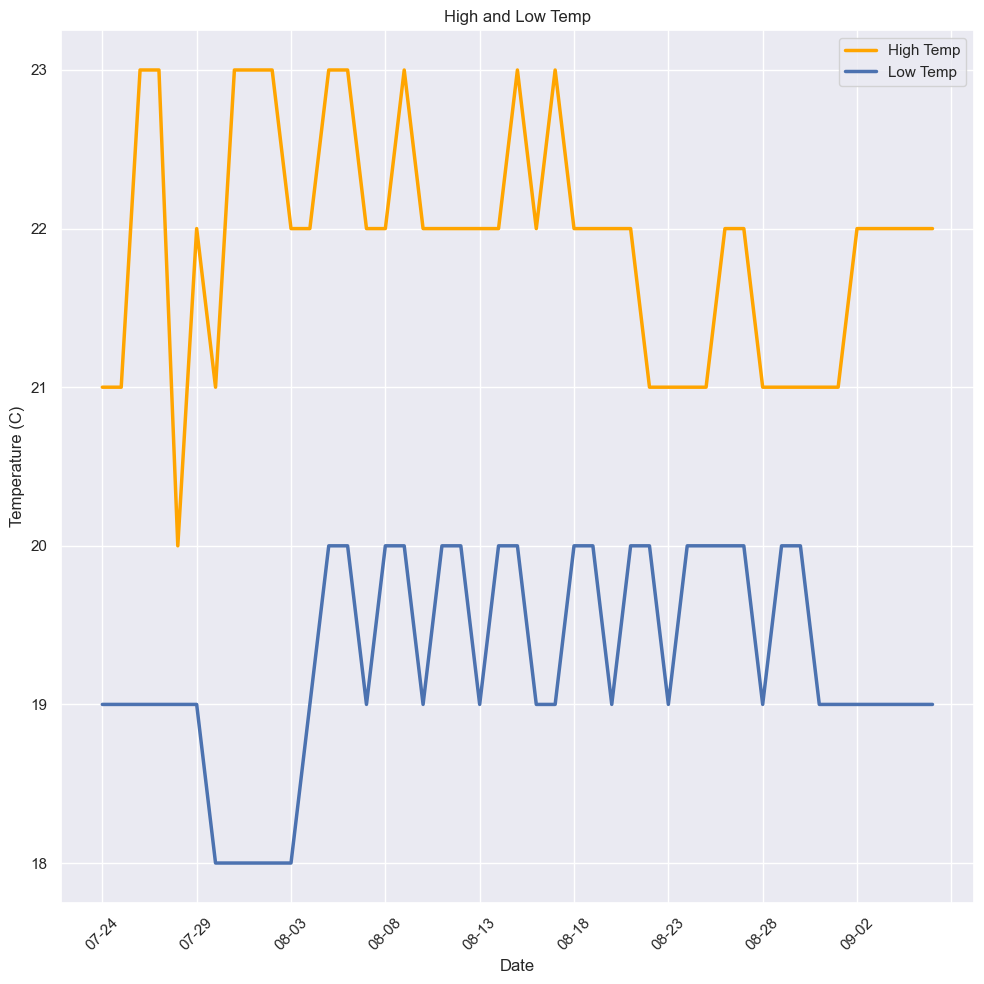

In [137]:
# Plot high and low temp vs date
plt.figure(figsize=(10, 10))
sns.lineplot(data=weather_df, x='date', y='high', label='High Temp', linewidth=2.5, color='orange')
sns.lineplot(data=weather_df, x='date', y='low', label='Low Temp', linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('High and Low Temp')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Plot Precipitation Trend

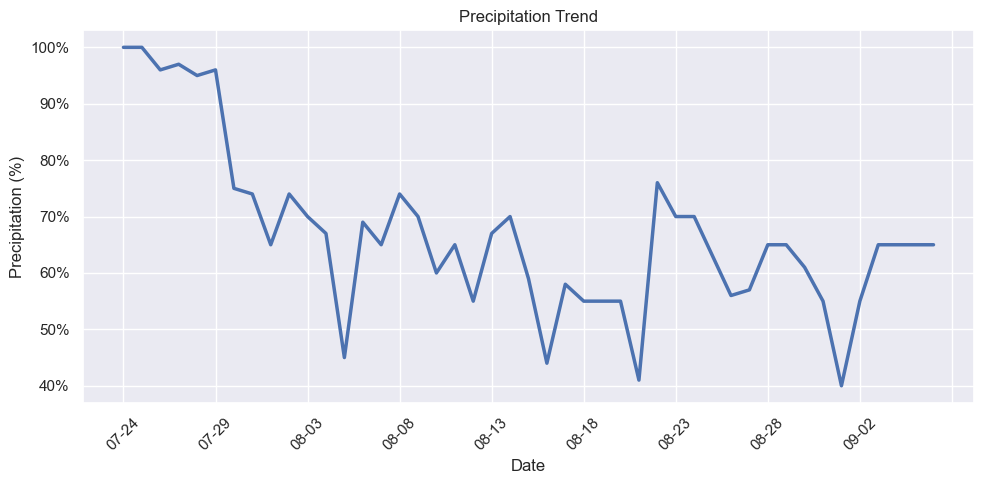

In [138]:
def percent(y, pos):
    return f'{y * 100:.0f}%'

# Plot precipitation trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=weather_df, x='date', y='precipitation', linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Precipitation (%)')
plt.title('Precipitation Trend')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot Real Feel and Real Feel (Shade)

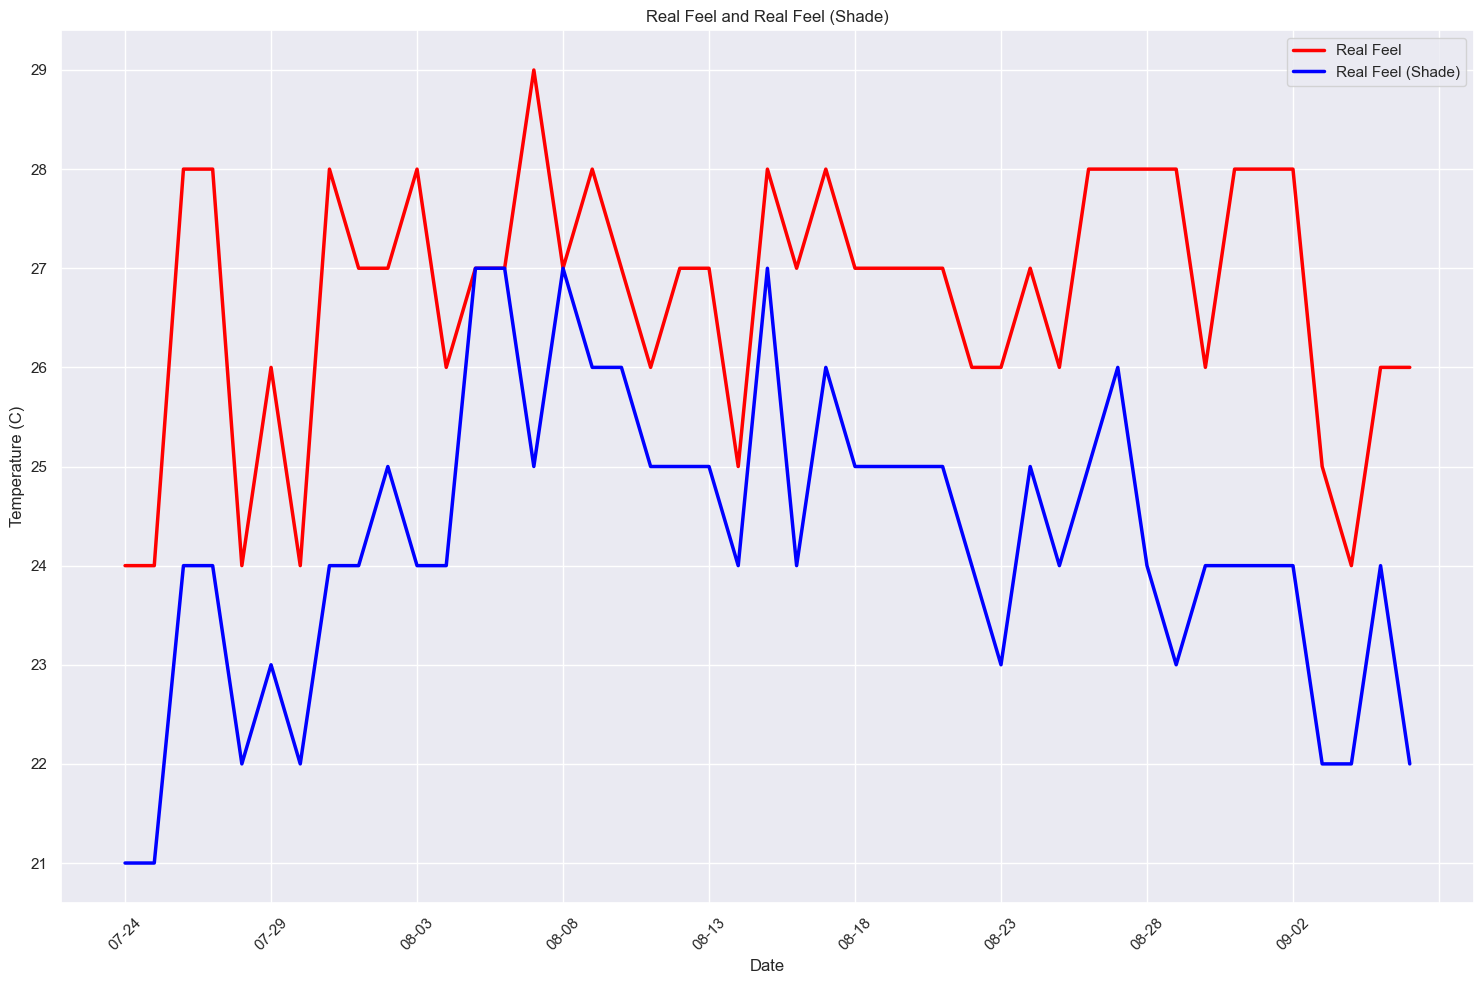

In [139]:
# Plot real feel and real feel shade
plt.figure(figsize=(15, 10))
sns.lineplot(data=weather_df, x='date', y='real feel', label='Real Feel', linewidth=2.5, color='red')
sns.lineplot(data=weather_df, x='date', y='real feel shade', label='Real Feel (Shade)', linewidth=2.5, color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Real Feel and Real Feel (Shade)')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Plot Max UV Index

C:\Users\Gianello Montenegro\AppData\Local\Temp\ipykernel_19792\565878538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_df, x='date', y='max uv index', palette='viridis')


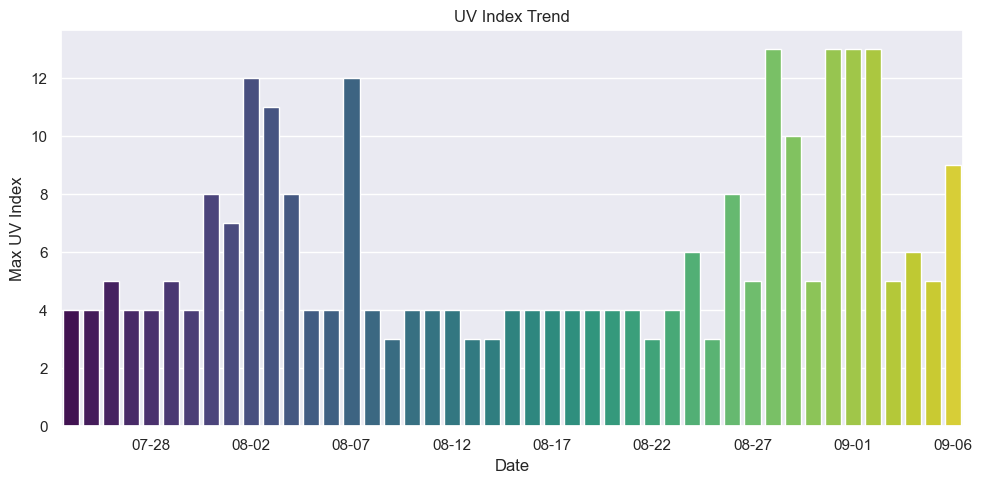

In [140]:
# Plot precipitation trend with color gradient
plt.figure(figsize=(10, 5))
sns.barplot(data=weather_df, x='date', y='max uv index', palette='viridis')
plt.xlabel('Date')
plt.ylabel('Max UV Index')
plt.title('UV Index Trend')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.tight_layout()
plt.show()

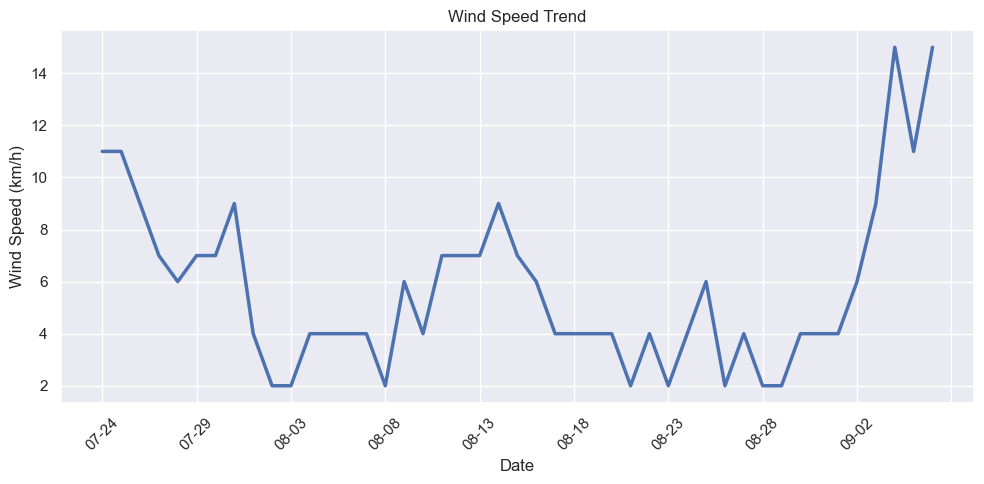

In [141]:
# Plot wind speed trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=weather_df, x='date', y='wind', linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Trend')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Matrix of every feature

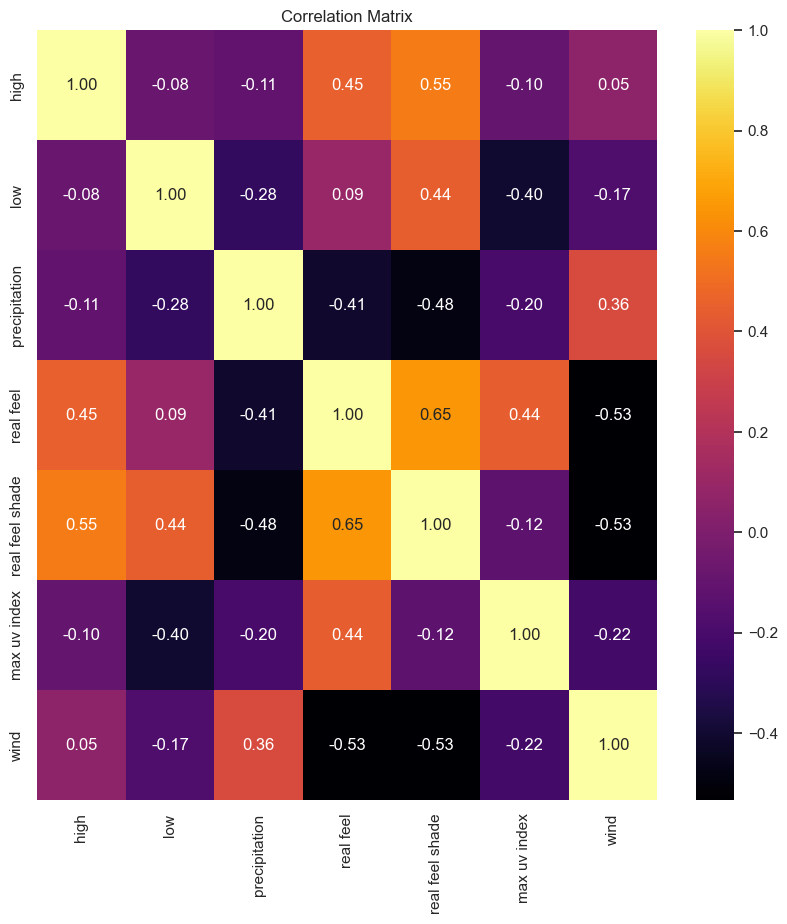

In [142]:
# Correlation matrix
# Completely drop date col since it's not needed for correlation
weather_df.drop(columns='date', inplace=True)


corr = weather_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
